In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [4]:
columns_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [5]:
diabetes[columns_to_norm] = diabetes[columns_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min() ))

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedrigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [9]:
#Using vocabulary list
assined_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A', 'B','C','D'])

In [10]:
#Hash bucket
#assined_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

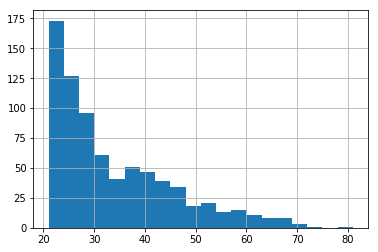

In [11]:
diabetes['Age'].hist(bins=20)

In [12]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [13]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,pedrigree,age_bucket,assined_group]

In [14]:
#Train Test Split

In [15]:
x_data = diabetes.drop('Class',axis=1)

In [16]:
labels = diabetes['Class']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [19]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                                 batch_size=10,num_epochs=1000,
                                                 shuffle=True)

In [20]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp43o4jpnd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9f26b9c780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp43o4jpnd/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 152.977
INFO:tensorflow:loss = 7.2248745, step = 101 (0.660 sec)
INFO:tensorflow:global_step/sec: 221.667
INFO:tensorflow:loss = 5.4832726, step = 201 (0.449 sec)
INFO:tensorflow:global_step/sec: 96.6171
INFO:tensorflow:loss = 5.0000772, step = 301 (1.033 sec)
INFO:tensorflow:global_step/sec: 224.411
INFO:tensorflow:loss = 6.3193054, step = 401 (0.450 sec)
INFO:tensorflow:global_step/sec: 231.649
INFO:tensorflow:loss = 5.250967, step = 501 (0.429 sec)
INFO:tensorflow:global_step/sec: 213.984
INFO:tensorflow:loss = 7.404669, step = 601 (0.469 sec)
INFO:tensorflow:global_step/sec: 256.116
INFO:tensorflow:los

In [22]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                     batch_size=10,num_epochs=1,
                                                     shuffle=False)

In [23]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-21-05:16:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp43o4jpnd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-21-05:16:49
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.64935064, auc = 0.80452675, auc_precision_recall = 0.6504041, average_loss = 0.52429384, global_step = 1000, label/mean = 0.35064936, loss = 5.046328, precision = 0.6769231, prediction/mean = 0.36226073, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp43o4jpnd/model.ckpt-1000


In [24]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80452675,
 'auc_precision_recall': 0.6504041,
 'average_loss': 0.52429384,
 'label/mean': 0.35064936,
 'loss': 5.046328,
 'precision': 0.6769231,
 'prediction/mean': 0.36226073,
 'recall': 0.54320985,
 'global_step': 1000}

In [25]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [26]:
predictions = model.predict(pred_input_func)

In [27]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp43o4jpnd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [28]:
my_pred

[{'logits': array([0.10851371], dtype=float32),
  'logistic': array([0.5271018], dtype=float32),
  'probabilities': array([0.47289816, 0.5271018 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.5207577], dtype=float32),
  'logistic': array([0.62732494], dtype=float32),
  'probabilities': array([0.3726751 , 0.62732494], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.5902844], dtype=float32),
  'logistic': array([0.35656962], dtype=float32),
  'probabilities': array([0.6434304 , 0.35656962], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.66509926], dtype=float32),
  'logistic': array([0.33959505], dtype=float32),
  'probabilities': array([0.6604049 , 0.33959508], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.7393023], dtype=float32),
  'logistic':

## Dnn Model

In [29]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,
                                        n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwgcpepg1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9f027524a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
embedded_group_col = tf.feature_column.embedding_column(assined_group,dimension=4)

In [31]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,pedrigree,age_bucket,embedded_group_col]

In [32]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [33]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,
                                        n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp88huzizq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9f030715c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp88huzizq/model.ckpt.
INFO:tensorflow:loss = 7.4824195, step = 1
INFO:tensorflow:global_step/sec: 127.287
INFO:tensorflow:loss = 5.2975464, step = 101 (0.792 sec)
INFO:tensorflow:global_step/sec: 205.047
INFO:tensorflow:loss = 7.2861433, step = 201 (0.484 sec)
INFO:tensorflow:global_step/sec: 210.555
INFO:tensorflow:loss = 4.7691455, step = 301 (0.477 sec)
INFO:tensorflow:global_step/sec: 195.275
INFO:tensorflow:loss = 7.1714363, step = 401 (0.517 sec)
INFO:tensorflow:global_step/sec: 182.328
INFO:tensorflow:loss = 5.5476294, step = 501 (0.544 sec)
INFO:tensorflow:global_step/sec: 186.201
INFO:tensorflow:loss = 4.6938367, step = 601 (0.536 sec)
INFO:tensorflow:global_step/sec: 184.647
INFO:tensorflow:

In [35]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [36]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-21-05:30:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp88huzizq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-21-05:30:15
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.8177366, auc_precision_recall = 0.6730381, average_loss = 0.49803454, global_step = 1000, label/mean = 0.35064936, loss = 4.7935824, precision = 0.625, prediction/mean = 0.3412782, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp88huzizq/model.ckpt-1000


{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8177366,
 'auc_precision_recall': 0.6730381,
 'average_loss': 0.49803454,
 'label/mean': 0.35064936,
 'loss': 4.7935824,
 'precision': 0.625,
 'prediction/mean': 0.3412782,
 'recall': 0.5555556,
 'global_step': 1000}